In [24]:
import numpy as np
from Ising_Model_Fast import *
from numba import njit

# Params

In [25]:
seed = 2025

N = 50
J1 = 0.5
J2 = 1.0
MC_steps = 5_000_000
save_images = False
images_spacing = np.array([0, 1])

simulation_params = {
    'N' : N,
    'J1' : J1,
    'J2' : J2,
    'MC_steps' : MC_steps,
    'save_images' : save_images,
    'images_spacing' : images_spacing,
    'seed' : seed,
}

In [33]:
np.random.seed(seed)
lattice = np.random.choice([-1, 1], size=(N, N))
energy = get_energy(lattice, N, J1, J2)

lattice_p = np.random.choice([-1, 1], size=(N, N), p=[0.25, 0.75])
lattice_n = np.random.choice([-1, 1], size=(N, N), p=[0.75, 0.25])

energy_p = get_energy(lattice_p, N, J1, J2)
energy_n = get_energy(lattice_n, N, J1, J2)

In [27]:
betas = np.arange(0.1, 2, 0.05)
temps = 1 / betas
n_temps = len(temps)

# Initialize arrays to store the results
avg_mags = np.empty(n_temps, dtype=np.float32)
avg_energies = np.empty(n_temps, dtype=np.float32)
heat_capacities = np.empty(n_temps, dtype=np.float32)

In [28]:
simulation_params['T'] = 0.1
use_last = 1000
mags, energies, iamges, _ = metropolis(lattice=lattice, energy=energy, **simulation_params)
avg_mag = np.mean(mags[-use_last:])
avg_energy = np.mean(energies[-use_last:])
avg_heat_capacity = compute_specific_heat(energies[-use_last:], N, simulation_params['T'], burn_in=0.1)

print(f"Temperature: {simulation_params['T']:.2f}, "
      f"Avg Magnetization: {avg_mag:.4f}, "
      f"Avg Energy: {avg_energy:.4f}, "
      f"Avg Heat Capacity: {avg_heat_capacity:.4f}")

Temperature: 0.10, Avg Magnetization: -0.3600, Avg Energy: -6900.0000, Avg Heat Capacity: 0.0000


In [43]:
def get_M_E_C_of_T(lattice, energy, Ts, simulation_params, use_last=1000, burn_in=0.1):
    """
    Calculate the average magnetization, energy, and heat capacity for a range of temperatures.
    """
    avg_mags = np.empty(len(Ts), dtype=np.float32)
    avg_energies = np.empty(len(Ts), dtype=np.float32)
    heat_capacities = np.empty(len(Ts), dtype=np.float32)

    for i, T in enumerate(Ts):
        simulation_params['T'] = T
        print("="*20)
        print(f"Starting Simulation for T = {T:.2f}")
        print("="*20)
        
        mags, energies, _, _ = metropolis(lattice=lattice, energy=energy, **simulation_params)

        avg_mags[i] = np.mean(mags[-use_last:])
        avg_energies[i] = np.mean(energies[-use_last:])
        heat_capacities[i] = compute_specific_heat(energies[-use_last:], N, T, burn_in=burn_in)

    return avg_mags, avg_energies, heat_capacities

In [44]:
betas = np.arange(0.1, 2, 0.05)
temps = 1 / betas
use_last = 1000

mags_p, energies_p, heat_capacities_p = get_M_E_C_of_T(lattice_p, energy_p, temps, simulation_params)
mags_n, energies_n, heat_capacities_n = get_M_E_C_of_T(lattice_n, energy_n, temps, simulation_params)

Starting Simulation for T = 10.00
Starting Simulation for T = 6.67
Starting Simulation for T = 5.00
Starting Simulation for T = 4.00
Starting Simulation for T = 3.33
Starting Simulation for T = 2.86
Starting Simulation for T = 2.50
Starting Simulation for T = 2.22
Starting Simulation for T = 2.00
Starting Simulation for T = 1.82
Starting Simulation for T = 1.67
Starting Simulation for T = 1.54
Starting Simulation for T = 1.43
Starting Simulation for T = 1.33
Starting Simulation for T = 1.25
Starting Simulation for T = 1.18
Starting Simulation for T = 1.11
Starting Simulation for T = 1.05
Starting Simulation for T = 1.00
Starting Simulation for T = 0.95
Starting Simulation for T = 0.91
Starting Simulation for T = 0.87
Starting Simulation for T = 0.83
Starting Simulation for T = 0.80
Starting Simulation for T = 0.77
Starting Simulation for T = 0.74
Starting Simulation for T = 0.71
Starting Simulation for T = 0.69
Starting Simulation for T = 0.67
Starting Simulation for T = 0.65
Starting 

In [29]:

for i, t in enumerate(temps):
    # Perform the simulation for each temperature
    simulation_params['T'] = t
    print("="*20)
    print(f"Starting Simulation for T = {t:.2f}")
    print("="*20)

    mags, energies, images, _ = metropolis(lattice=lattice, energy=energy, **simulation_params)
    avg_mags[i] = np.mean(mags[-use_last:])
    avg_energies[i] = np.mean(energies[-use_last:])
    heat_capacities[i] = compute_specific_heat(energies[-use_last:], N, t, burn_in=0.1)

Starting Simulation for T = 10.00
Starting Simulation for T = 6.67
Starting Simulation for T = 5.00
Starting Simulation for T = 4.00
Starting Simulation for T = 3.33
Starting Simulation for T = 2.86
Starting Simulation for T = 2.50
Starting Simulation for T = 2.22
Starting Simulation for T = 2.00
Starting Simulation for T = 1.82
Starting Simulation for T = 1.67
Starting Simulation for T = 1.54
Starting Simulation for T = 1.43
Starting Simulation for T = 1.33
Starting Simulation for T = 1.25
Starting Simulation for T = 1.18
Starting Simulation for T = 1.11
Starting Simulation for T = 1.05
Starting Simulation for T = 1.00
Starting Simulation for T = 0.95
Starting Simulation for T = 0.91
Starting Simulation for T = 0.87
Starting Simulation for T = 0.83
Starting Simulation for T = 0.80
Starting Simulation for T = 0.77
Starting Simulation for T = 0.74
Starting Simulation for T = 0.71
Starting Simulation for T = 0.69
Starting Simulation for T = 0.67
Starting Simulation for T = 0.65
Starting 

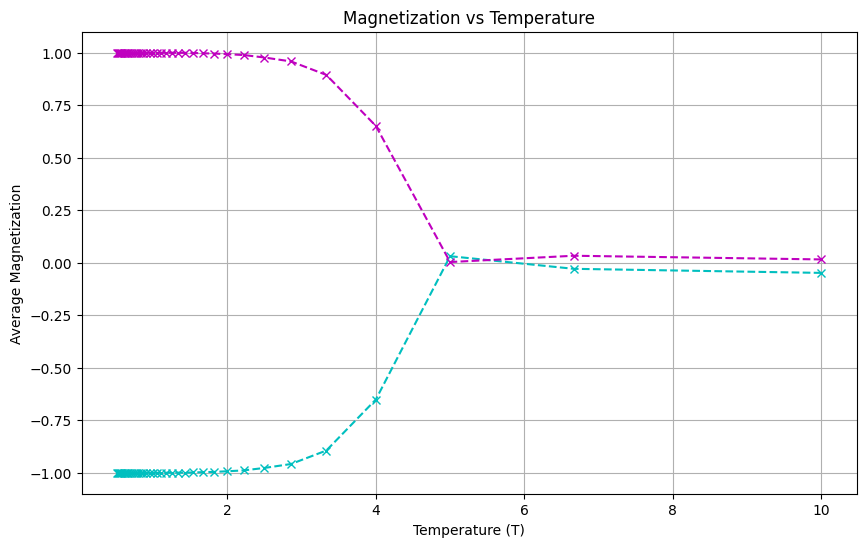

In [46]:
plt.figure(figsize=(10, 6))
plt.title('Magnetization vs Temperature')
plt.plot(temps, mags_n, 'cx--', label='Magnetization (p=0.25)')
plt.plot(temps, mags_p, 'mx--', label='Magnetization (p=0.75)')
plt.xlabel('Temperature (T)')
plt.ylabel('Average Magnetization')
plt.grid()

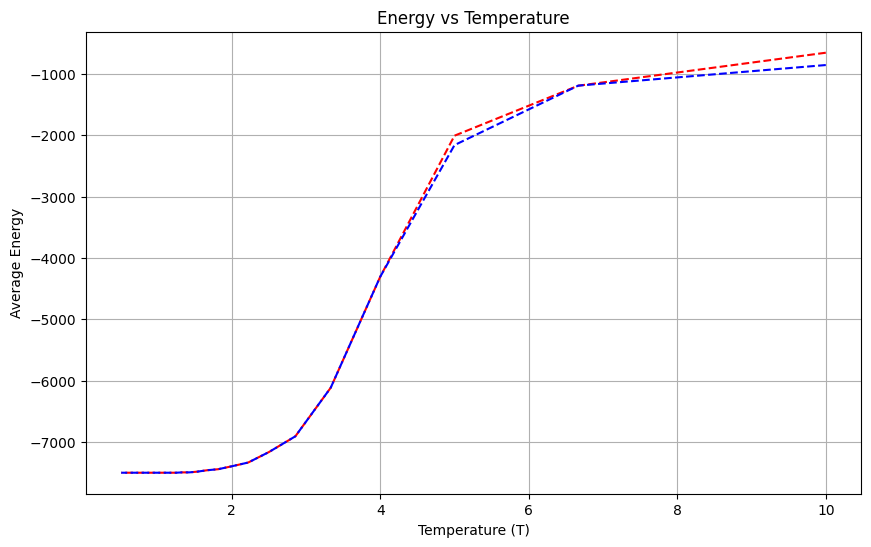

In [47]:
plt.figure(figsize=(10, 6))
plt.title('Energy vs Temperature')
plt.plot(temps, energies_n, 'r--', label='Energy (p=0.25)')
plt.plot(temps, energies_p, 'b--', label='Energy (p=0.75)')
plt.xlabel('Temperature (T)')
plt.ylabel('Average Energy')
plt.grid()

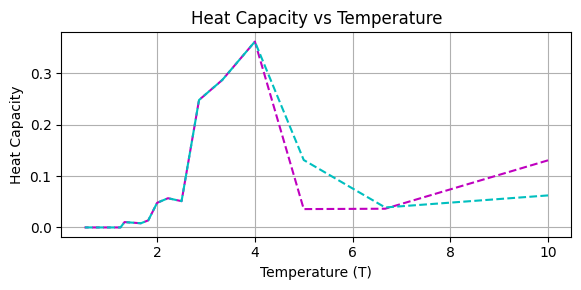

In [48]:
plt.figure(figsize=(6, 3))
plt.title('Heat Capacity vs Temperature')
plt.plot(temps, heat_capacities_n, 'm--', label='Heat Capacity')
plt.plot(temps, heat_capacities_p, 'c--', label='Heat Capacity')
plt.xlabel('Temperature (T)')
plt.ylabel('Heat Capacity')
plt.grid()
plt.tight_layout()